In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
df = pd.read_csv("homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [39]:
from sklearn import preprocessing
X_independent_Scaling = preprocessing.MinMaxScaler()
y_dependent_Scaling = preprocessing.MinMaxScaler()

Scaled_X = X_independent_Scaling.fit_transform(df.drop('price' , axis = 'columns'))
Scaled_y = y_dependent_Scaling.fit_transform(df['price'].values.reshape(df.shape[0] ,1))

In [40]:
Scaled_X.shape[1]

2

In [41]:
Scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [42]:
def batch_gradient_descent(X,y_true,epochs , learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, Scaled_X.T) + b
        w_grad = -(2/total_samples)* (X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list, epoch_list
w, b, cost, cost_list, epoch_list = batch_gradient_descent(Scaled_X, Scaled_y.reshape(Scaled_y.shape[0],),500)
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

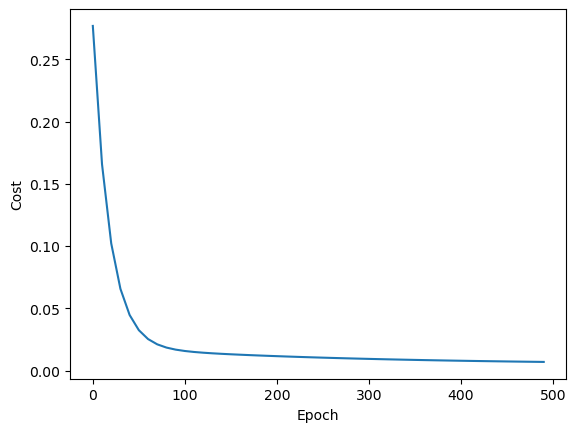

In [43]:
# Matplotlib.pyplot as plt
plt.xlabel("Epoch")
plt.ylabel("Cost")
plt.plot(epoch_list,cost_list)

In [45]:
def predict(area, bedrooms, w, b):
    Scaled_X = X_independent_Scaling.transform([[area,bedrooms]])[0]
    Scaled_price = w[0] * Scaled_X[0] + w[1] * Scaled_X[1] + b
    return y_dependent_Scaling.inverse_transform([[Scaled_price]])[0]
predict(2600,4,w,b)

array([128.45484403])

In [48]:
# Stochastic Gradient Descent 
def stochastic_gradient_descent(X,y_true,epochs , learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        random_index = np.random.randint(0, total_samples -1)
        sample_X = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, Scaled_X.T) + b
        
        w_grad = -(2/total_samples)* (X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w, b, cost, cost_list, epoch_list
w_sgd, b_sgb, cost_sgb, cost_list_sgb, epoch_list_sgb = stochastic_gradient_descent(Scaled_X, Scaled_y.reshape(Scaled_y.shape[0],),500)
w_sgd,b_sgb,cost_sgb

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)